In [1]:
import pandas as pd
import os 
import duckdb
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from researchpy import ttest as rpTtest
import researchpy as rp
import math

In [2]:
path = os.getcwd() #current path
path

'/Users/lucyyin/ST542/new'

In [3]:
# read into the data
data = pd.read_excel(path + '/3.The Single Clean Dataset.xlsx')
data = data.dropna()

In [4]:
data.head()

,First Name,Last Name,Student ID number,LSC 101 Instructor,Gender,Race,Intended Major_beginning,Intended Major_end,Hometown Type_end,Deidentified Number,...,RSFlexibility,RSOriginality,FluencySA_end,FlexibilitySA_end,OriginalitySA_end,AverageSA_end,RSFluency_end,RSFlexibility_end,RSOriginality_end,Include Student data for Analysis?
0,Bilal,Adam Malik,200398445.0,Dr. Erica Kosal,Male,Asian,Zoology,Zoology,City,1.0,...,44.0,49.0,100.0,122.0,101.0,108.0,89.0,61.0,73.0,Yes
1,Hifza,Alam,200404629.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,2.0,...,34.0,41.0,92.0,95.0,92.0,93.0,70.0,41.0,55.0,Yes
2,Ariba,Ali,200404663.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,3.0,...,42.0,65.0,108.0,111.0,106.0,108.0,110.0,54.0,85.0,Yes
3,Lexie,Allred,200394288.0,Dr. Kenny Kuo,Female,Caucasian; White,Biology - BS,Biology - BS,Rural Area,4.0,...,39.0,45.0,101.0,102.0,93.0,99.0,91.0,46.0,57.0,Yes
4,Fanuel,Andemariam,200430376.0,Dr. Kenny Kuo,Male,African-American; Black; African,Biochemistry,Biochemistry,City,5.0,...,36.0,48.0,91.0,93.0,90.0,91.0,69.0,40.0,51.0,Yes


In [5]:
# create new score difference columns
data['average_diff'] = data['AverageSA_end'] - data['AverageSA']
data['fluency_diff'] = data['FluencySA_end'] - data['FluencySA']
data['flexibility_diff'] = data['FlexibilitySA_end'] - data['FlexibilitySA']
data['originality_diff'] = data['OriginalitySA_end'] - data['OriginalitySA']
data.head()

,First Name,Last Name,Student ID number,LSC 101 Instructor,Gender,Race,Intended Major_beginning,Intended Major_end,Hometown Type_end,Deidentified Number,...,OriginalitySA_end,AverageSA_end,RSFluency_end,RSFlexibility_end,RSOriginality_end,Include Student data for Analysis?,average_diff,fluency_diff,flexibility_diff,originality_diff
0,Bilal,Adam Malik,200398445.0,Dr. Erica Kosal,Male,Asian,Zoology,Zoology,City,1.0,...,101.0,108.0,89.0,61.0,73.0,Yes,10.0,0.0,19.0,9.0
1,Hifza,Alam,200404629.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,2.0,...,92.0,93.0,70.0,41.0,55.0,Yes,16.0,15.0,18.0,14.0
2,Ariba,Ali,200404663.0,Dr. Kenny Kuo,Female,Asian,Biology - BS,Biology - BS,City,3.0,...,106.0,108.0,110.0,54.0,85.0,Yes,-42.0,-3.0,13.0,0.0
3,Lexie,Allred,200394288.0,Dr. Kenny Kuo,Female,Caucasian; White,Biology - BS,Biology - BS,Rural Area,4.0,...,93.0,99.0,91.0,46.0,57.0,Yes,8.0,9.0,10.0,5.0
4,Fanuel,Andemariam,200430376.0,Dr. Kenny Kuo,Male,African-American; Black; African,Biochemistry,Biochemistry,City,5.0,...,90.0,91.0,69.0,40.0,51.0,Yes,3.0,7.0,6.0,-2.0


In [6]:
# see column names to make sure new columns were added
print(data.columns)

Index(['First Name', 'Last Name', 'Student ID number', 'LSC 101 Instructor',
       'Gender', 'Race', 'Intended Major_beginning', 'Intended Major_end',
       'Hometown Type_end', 'Deidentified Number', 'unweighted_hs_gpa',
       'weighted_hs_gpa', 'Quiz_Score_end', 'S1_beginning', 'S2_beginning',
       'S3_beginning', 'S4_beginning', 'S5_beginning', 'S6_beginning',
       'S7_beginning', 'S8_beginning', 'S9_beginning', 'S10_beginning',
       'S11_beginning', 'S12_beginning', 'S13_beginning', 'Q12a_beginning',
       'Q1_beginning', 'Q2_beginning', 'Q3_beginning', 'Q4_beginning',
       'Q5_beginning', 'Q6_beginning', 'Q7_beginning', 'Q8_beginning',
       'Q9_beginning', 'Q10_beginning', 'Q11_beginning', 'S1_end', 'S2_end',
       'S3_end', 'S4_end', 'S5_end', 'S6_end', 'S7_end', 'S8_end', 'S9_end',
       'S10_end', 'S11_end', 'S12_end', 'S13_end', 'Q12b_end', 'Q1_end',
       'Q2_ end', 'Q4_end', 'Q5_end', 'Q6_end', 'Q7_end', 'Q8_end', 'Q9_end',
       'Q10_end', 'Q11_end', 'Q1_e

In [7]:
# We have 198 students in our final dataset
data.shape

(198, 86)

In [8]:
# frequency table of gender
data['Gender'].value_counts()
# Why most of students are female?

Female                  167
Male                     27
Non-Binary                2
Prefer not to answer      2
Name: Gender, dtype: int64

In [9]:
# frequency table of Race
data['Race'].value_counts()

Caucasian; White                             141
African-American; Black; African              15
Hispanic; Latinx                              13
Asian                                         10
Multiracial                                   10
Indian                                         8
Native Hawaiian or Other Pacific Islander      1
Name: Race, dtype: int64

In [10]:
# frequency table of intended major at the begin
data['Intended Major_beginning'].value_counts()

Biology - BS                  104
Biochemistry                   21
Zoology                        18
Biology - BA                   18
Nutrition                      15
Genetics                       15
Microbiology                    5
Plant Biology                   1
A major outside of science      1
Name: Intended Major_beginning, dtype: int64

In [11]:
# frequency table of intended major at the end
data['Intended Major_end'].value_counts()

Biology - BS                  100
Nutrition                      18
Biochemistry                   16
Genetics                       16
Zoology                        15
Biology - BA                   15
A major outside of science     12
Microbiology                    4
Plant Biology                   2
Name: Intended Major_end, dtype: int64

In [12]:
# frequency table of hometown
data['Hometown Type_end'].value_counts()

Town          62
City          52
Suburb        49
Rural Area    31
Village        4
Name: Hometown Type_end, dtype: int64

In [13]:
X = data[['Intended Major_beginning', 'Hometown Type_end', 'Race', 'Gender', 'weighted_hs_gpa', 'LSC 101 Instructor']]
Y = data['average_diff']

In [14]:
# reference: https://www.kaggle.com/code/adachowicz/house-prices-random-forest-regression-analysis
# Random forest 
# Pre-processing Categorical Features
# define a function to convert an object (categorical) feature into an int feature
# 0 = most common category, highest int = least common.
# Gender = 2 means Female.
def getObjectFeature(df, col, datalength=500):
    if df[col].dtype!='object': # if it's not categorical..
        print('feature',col,'is not an object feature.')
        return df
    elif len([i for i in df[col].T.notnull() if i == True])!=datalength: # if there's missing data..
        print('feature',col,'is missing data.')
        return df
    else:
        df1 = df
        counts = df1[col].value_counts() # get the counts for each label for the feature
        df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
        print(counts.index.tolist())
        return df1 # make the new (integer) column from the conversion

# and test the function...
# fcntest = getObjectFeature(X, 'Gender', len(X.Gender))
X = getObjectFeature(X, 'Race', len(X.Race))
X = getObjectFeature(X, 'Hometown Type_end', len(X['Hometown Type_end']))
X = getObjectFeature(X, 'Intended Major_beginning', len(X['Intended Major_beginning']))
X = getObjectFeature(X, 'LSC 101 Instructor', len(X['LSC 101 Instructor']))
X = getObjectFeature(X, 'Gender', len(X.Gender))
X.head(10)

['Caucasian; White', 'African-American; Black; African', 'Hispanic; Latinx', 'Asian', 'Multiracial', 'Indian', 'Native Hawaiian or Other Pacific Islander']
['Town', 'City', 'Suburb', 'Rural Area', 'Village']
['Biology - BS', 'Biochemistry', 'Zoology', 'Biology - BA', 'Nutrition', 'Genetics', 'Microbiology', 'Plant Biology', 'A major outside of science']
['Dr. Kenny Kuo', 'Dr. Erica Kosal']
['Female', 'Male', 'Non-Binary', 'Prefer not to answer']


/var/folders/y7/_1vxzd515rx2fsyf76lh5z980000gn/T/ipykernel_58672/1818022599.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
/var/folders/y7/_1vxzd515rx2fsyf76lh5z980000gn/T/ipykernel_58672/1818022599.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = [counts.index.tolist().index(i) for i in df1[col]] # do the conversion
/var/folders/y7/_1vxzd515rx2fsyf76lh5z980000gn/T/ipykernel_58672/1818022599.py:17: Setting

,Intended Major_beginning,Hometown Type_end,Race,Gender,weighted_hs_gpa,LSC 101 Instructor
0,2,1,3,1,4.086,1
1,0,1,3,0,4.500,0
2,0,1,3,0,4.344,0
3,0,3,0,0,4.540,0
4,1,1,1,1,4.359,0
5,0,0,2,0,4.375,1
6,4,2,5,0,4.234,0
8,0,2,5,0,4.438,0
9,3,3,0,0,4.220,1
10,0,1,0,0,4.609,1


In [15]:
# Random forest
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...
# let's set up some cross-validation analysis to evaluate our model and later models...
from sklearn.model_selection import cross_val_score
# try fitting a decision tree regression model...
DTR_1 = dtr(max_depth=None) # declare the regression model form. Let the depth be default.
# DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))
# consider an ensemble of trees
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []
yt = [i for i in Y[:,]] # quick pre-processing of the target
np.random.seed(11111)
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None)
    scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

scores for k=10 fold validation: [-0.82439121 -0.36070562 -1.9194582  -1.08068318 -0.85708953 -0.92874684
 -1.49254583 -8.89573023 -1.88879261 -0.18535511]
Est. explained variance: -1.84 (+/- 4.83)
estimators: 2
Est. explained variance: -0.92 (+/- 1.38)

estimators: 5
Est. explained variance: -0.67 (+/- 1.07)

estimators: 10
Est. explained variance: -0.35 (+/- 0.76)

estimators: 15
Est. explained variance: -0.25 (+/- 0.42)

estimators: 20
Est. explained variance: -0.40 (+/- 0.54)

estimators: 25
Est. explained variance: -0.34 (+/- 0.79)

estimators: 30
Est. explained variance: -0.37 (+/- 0.70)

estimators: 35
Est. explained variance: -0.28 (+/- 0.56)

estimators: 40
Est. explained variance: -0.25 (+/- 0.47)

estimators: 45
Est. explained variance: -0.28 (+/- 0.59)

estimators: 50
Est. explained variance: -0.32 (+/- 0.63)

estimators: 55
Est. explained variance: -0.22 (+/- 0.53)

estimators: 60
Est. explained variance: -0.29 (+/- 0.59)

estimators: 65
Est. explained variance: -0.23 (+/-

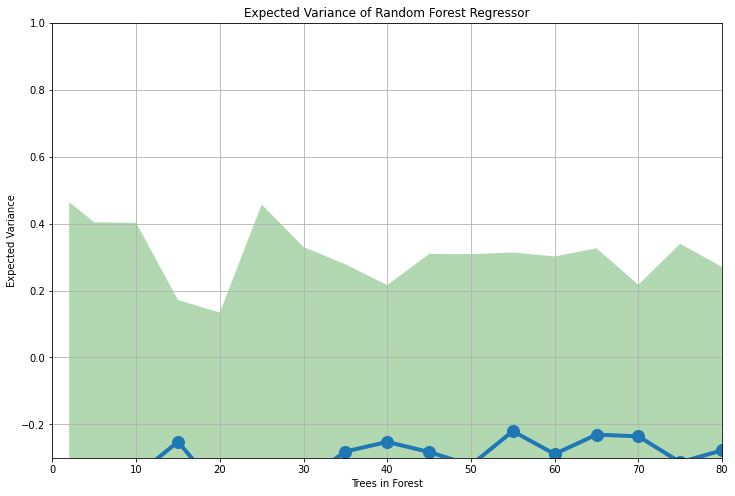

In [16]:
# and plot...
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.3,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()


[['Gender' '0.05984760101170461']
 ['LSC 101 Instructor' '0.040632850643085305']
 ['Intended Major_beginning' '0.008267147354108495']
 ['Race' '0.005227919204222609']
 ['Hometown Type_end' '0.0']
 ['weighted_hs_gpa' '0.0']]


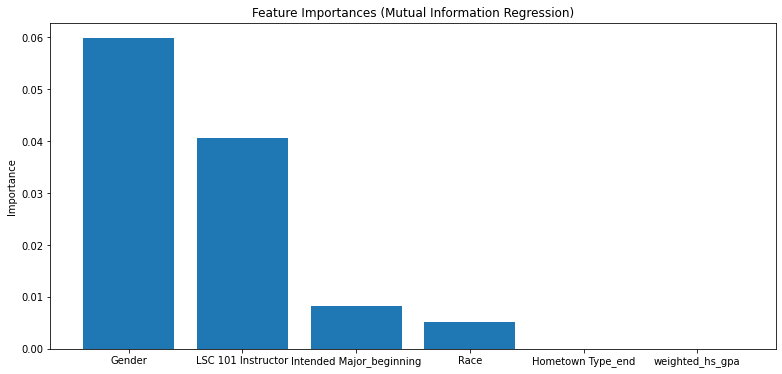

In [17]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn
# first, let's include every feature that has data for all 1460 houses in the data set...
included_features = [col for col in X.columns]
mir_result = fs.mutual_info_regression(X, yt) # mutual information regression feature ordering
feature_scores = []
for i in np.arange(len(included_features)):
    feature_scores.append([included_features[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
print(np.array(sorted_scores))
# and plot...
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ind = np.array(sorted_scores)[:,0]
plt.bar(ind,[float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
plt.show()

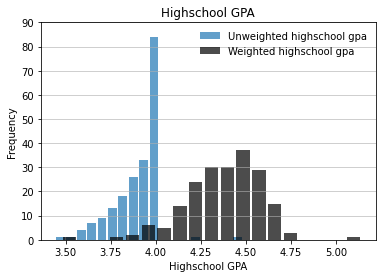

In [18]:
# histogram for High school GPA

n, bins, patches = plt.hist(x=data.iloc[:, 10], bins='auto',
                            alpha=0.7, rwidth=0.85, label = 'Unweighted highschool gpa')
n1, bins1, patches1 = plt.hist(x=data.iloc[:, 11], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85, label='Weighted highschool gpa')                            
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Highschool GPA')
plt.ylabel('Frequency')
plt.title('Highschool GPA')
plt.legend(loc='best', frameon=False)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()


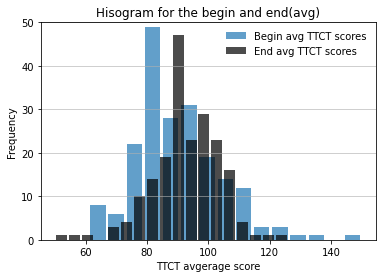

In [19]:
# histogram for begin and end TTCT score(Avg) 
n, bins, patches = plt.hist(x=data.iloc[:, 70], bins='auto',
                            alpha=0.7, rwidth=0.85, label = 'Begin avg TTCT scores')
n1, bins1, patches1 = plt.hist(x=data.iloc[:, 77], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85, label='End avg TTCT scores')                            
plt.grid(axis='y', alpha=0.75)
plt.xlabel('TTCT avgerage score')
plt.ylabel('Frequency')
plt.title('Hisogram for the begin and end(avg)')
plt.legend(loc='best', frameon=False)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

qqplot for the begin avg score
qqplot for the end avg score


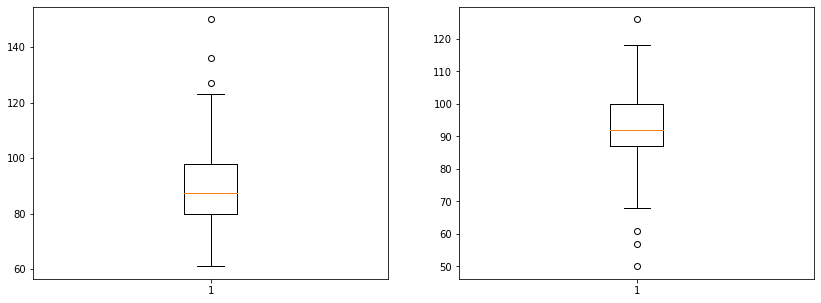

<Figure size 432x288 with 0 Axes>

In [20]:
# Boxplot for the begin and end TTCT score(avg)
from scipy.stats import norm
print('qqplot for the begin avg score')
# for each column we plot the qqplot
fig = plt.figure(figsize=(14,5))  
ax1 = fig.add_subplot(121) 
plt.boxplot(data.iloc[:,70])
print('qqplot for the end avg score')
ax1 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.2, hspace=0.1)
plt.boxplot(data.iloc[:,77])
fig = plt.figure()

In [21]:
# according to the above plots, we can see that there is a score more than 140
data['AverageSA'].max()
# the highest is 150

150.0

qqplot for the begin and end avg score difference
AverageSA


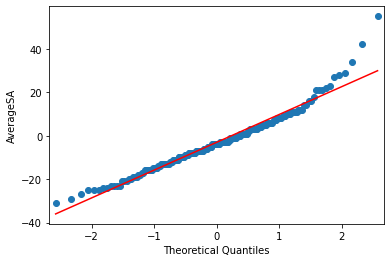

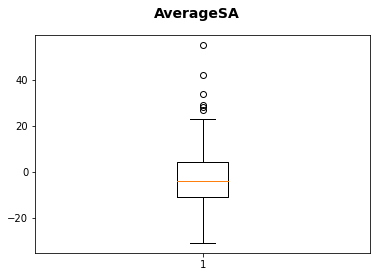

In [22]:
# For problem 1
# Is there a difference between begin and end 
# qqplot
print('qqplot for the begin and end avg score difference')
# for each column we plot the qqplot
print(data.columns[70])
sm.qqplot(data.iloc[:,70] - data.iloc[:,77], line = 's', ylabel = data.columns[70])
# boxplot
fig = plt.figure()
fig.suptitle(data.columns[70], fontsize=14, fontweight='bold')
plt.boxplot(data.iloc[:,70] - data.iloc[:,77])
plt.show()